In [60]:
import pandas as pd

data_path = 'CM_logD_regression.xlsx'

elements = ["Mn", "Co", "Ni", "Cu"]


df = pd.read_excel(data_path, sheet_name="combined_new")
# Remove rows with NaN values
df = df.dropna()

# Reset index after dropping NaN values
df = df.reset_index(drop=True)
# # scale each column by doing df[col] = df[col] / abs(df[col]).max()

sf_dict = {}
for col in df.columns:
    scaled_column_name = f"{col}_scaled"
    if df[col].dtype in ['float64', 'int64']:
        if col in ["pH", "[D2EHPA] ", "log D (obs)_Mn", "log D (obs)_Co", "log D (obs)_Ni", "log D (obs)_Cu"]:
            max_value = 1
            df[scaled_column_name] = df[col] / max_value
        else:
            # if col in ["[Mn] (mol/L)", "[Co] (mol/L)", "[Ni] (mol/L)", "[Cu] (mol/L)"]:
            #     df[scaled_column_name] =  (df[col] - df[col].mean() )  / (df[col].max() - df[col].min() )    
            # else:
            max_value = abs(df[col]).max()
            df[scaled_column_name] = df[col] / max_value

        sf_dict[col] = max_value
        print(f"Scaled {col} by {max_value}")



Scaled pH by 1
Scaled A/O by 2.61
Scaled [D2EHPA]  by 1
Scaled extraction_Mn by 99.97
Scaled extraction_Co by 70.91
Scaled extraction_Ni by 43.58
Scaled extraction_Cu by 96.59
Scaled Dobs_Mn by 4998.499999999811
Scaled Dobs_Co by 3.0813008130081303
Scaled Dobs_Ni by 1.2164683177870699
Scaled Dobs_Cu by 41.60344827586202
Scaled log D (obs)_Mn by 1
Scaled log D (obs)_Co by 1
Scaled log D (obs)_Ni by 1
Scaled log D (obs)_Cu by 1
Scaled [Mn] (mol/L) by 0.19
Scaled [Co] (mol/L) by 5.6e-05
Scaled [Ni] (mol/L) by 0.00014
Scaled [Cu] (mol/L) by 0.000189


## Some extra data points were removed 

In [61]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,3.53,1.00,0.35,87.23,36.73,30.81,93.83,6.830854,0.580528,0.445296,...,0.366056,0.365534,0.834475,-0.236177,-0.351352,1.182057,0.736842,1.000000,1.000000,0.317460
2,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
3,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
4,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
5,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
6,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
7,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
8,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
9,2.56,1.00,0.35,99.38,44.25,25.13,85.06,160.290323,0.793722,0.335648,...,0.275920,0.136850,2.204907,-0.100332,-0.474115,0.755375,0.315789,1.000000,1.000000,0.317460


In [53]:
# remove row 27 and reindex

df = df.drop(index=29)  # A/O is much lower than other cases
df = df.drop(index=27)  # [DEH2PA] is suspect (Much lower than other cases)
df = df.drop(index=21)  # Ni log D is suspect (based on residual plot)
df = df.drop(index=23)
df = df.reset_index(drop=True)


# Drop other suspect rows based on where we hit the lower bound
# These dont work as well.
# df = df.drop(index=0)
# df = df.drop(index=3)
# df = df.drop(index=10)

# df = df.reset_index(drop=True)

In [54]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,3.53,1.00,0.35,87.23,36.73,30.81,93.83,6.830854,0.580528,0.445296,...,0.366056,0.365534,0.834475,-0.236177,-0.351352,1.182057,0.736842,1.000000,1.000000,0.317460
2,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
3,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
4,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
5,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
6,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
7,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
8,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
9,2.56,1.00,0.35,99.38,44.25,25.13,85.06,160.290323,0.793722,0.335648,...,0.275920,0.136850,2.204907,-0.100332,-0.474115,0.755375,0.315789,1.000000,1.000000,0.317460


In [55]:
def data_removal(df, i):
    df = df.drop(index=i)  # Ni log D is suspect (based on residual plot)
    df = df.reset_index(drop=True)
    return df      

In [ ]:
from idaes.core.util import model_statistics as mstat
import pyomo.environ as pyo
import numpy as np
from sklearn.metrics import r2_score

def model_prediction(df, index):

    n_data = df.shape[0]

    m = pyo.ConcreteModel()

    m.I = pyo.RangeSet(0, n_data-1)
    m.elements = pyo.Set(initialize = elements)

    # Input data vars
    m.pH = pyo.Var(m.I, domain=pyo.Reals, initialize=0.0)
    m.C_ex = pyo.Var(m.I, domain=pyo.Reals, initialize=0.0)
    m.Cfeed = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.0)


    # Output variable
    m.logD = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.0)


    # Parameters
    ablist = [1, 2, 3, 4, 5, 6]

    ai_list = [3, 4, 5, 6, 7]
    bi_list = [1, 2]
    ci_list = [1, 2, 3, 4]
    di_list = [1, 2, 3, 4]

    m.a_set = pyo.Set(initialize = ablist)
    m.b_set = pyo.Set(initialize = ablist)

    m.ai_set = pyo.Set(initialize = ai_list)
    m.bi_set = pyo.Set(initialize = bi_list)
    m.ci_set = pyo.Set(initialize = ci_list)
    m.di_set = pyo.Set(initialize = di_list)

    m.a12 = pyo.Var(m.a_set, m.elements, domain=pyo.Reals, initialize=0.5)
    m.b12 = pyo.Var(m.b_set, m.elements, domain=pyo.Reals, initialize=0.5)
    m.c12 = pyo.Var(m.ci_set, m.elements, domain=pyo.Reals, initialize=0.5)
    m.d12 = pyo.Var(m.di_set, m.elements, domain=pyo.Reals, initialize=0.0)

    m.ai = pyo.Var(m.ai_set, domain=pyo.NonNegativeReals, initialize=0.5)

    m.alpha = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.5)
    m.beta = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.5)

    name_mapper_general = {
        'pH_scaled': m.pH,
        '[D2EHPA] _scaled': m.C_ex}


    def map_generator(element):
        return {
        f'[{element}] (mol/L)_scaled': m.Cfeed,
        f'log D (obs)_{element}_scaled': m.logD}



    name_mapper_elements = {}

    for element in m.elements:
        name_mapper_elements[element] = map_generator(element)


    # # Initialize input variables
    for col in name_mapper_general.keys():
        for i in df.index:
            name_mapper_general[col][i].fix(df[col][i])


    for element in m.elements:
        for i in df.index:
            for col in name_mapper_elements[element].keys():
                name_mapper_elements[element][col][i, element].fix(df[col][i])
            
    # # Model variales

    m.logD_scaled_pred =  pyo.Var(m.I, m.elements, initialize = 0.1, domain=pyo.Reals)
    m.Cext_net_pred = pyo.Var(m.I, domain=pyo.Reals, initialize=0.1, bounds = (1e-3, 2))
    m.logCext_net_pred = pyo.Var(m.I, domain=pyo.Reals, initialize=0.1, bounds = (np.log10(1e-10), np.log10(2)))



    # Constraints

    @m.Constraint(m.I)
    def logCext_net_pred_constraint(m, i):
        return 10**(m.logCext_net_pred[i]) == m.Cext_net_pred[i]


    m.resid = pyo.Var(m.I, m.elements)

    @m.Constraint(m.I, m.elements)
    def alpha_const(m, i, e):
        linear_term = m.a12[3, e]*m.Cfeed[i, "Mn"] + m.a12[4, e]*m.Cfeed[i, "Co"] +  m.a12[5, e]*m.Cfeed[i, "Ni"] + m.a12[6, e]*m.Cfeed[i, "Cu"]
        quad_term = m.c12[1, e]*m.Cfeed[i, "Mn"]**2 + m.c12[2, e]*m.Cfeed[i, "Co"]**2 + m.c12[3, e]*m.Cfeed[i, "Ni"]**2 + m.c12[4, e]*m.Cfeed[i, "Cu"]**2
        cube_term = m.d12[1, e]*m.Cfeed[i, "Mn"]**3 + m.d12[2, e]*m.Cfeed[i, "Co"]**3 + m.d12[3, e]*m.Cfeed[i, "Ni"]**3 + m.d12[4, e]*m.Cfeed[i, "Cu"]**3
        return (m.alpha[i, e] - m.a12[1, e]  + m.a12[2, e]*m.C_ex[i] 
                + linear_term 
                + quad_term 
                # + cube_term
                ) == 0

    @m.Constraint(m.I, m.elements)
    def b_const(m, i, e):
        return m.beta[i, e] == m.b12[1, e] + m.b12[2, e]*m.logCext_net_pred[i]

    @m.Constraint(m.I)
    def Cext_net_pred_constraint(m, i):
        return m.Cext_net_pred[i] == m.C_ex[i] - m.ai[3]*m.Cfeed[i, "Mn"] - m.ai[4]*m.Cfeed[i, "Co"]  -m.ai[5]*m.Cfeed[i, "Cu"] - m.ai[6]*m.Cfeed[i, "Ni"] - m.ai[7]

    @m.Constraint(m.I)
    def Cext_net_value_constraint(m, i):
        return  m.C_ex[i] - m.Cext_net_pred[i]>=0

    @m.Constraint(m.I, m.elements)
    def logD_scaled_pred_constraint(m, i, e):
        return m.logD_scaled_pred[i, e] == m.alpha[i, e]*m.pH[i] + m.beta[i, e]

    @m.Objective(sense = pyo.minimize)
    def objective_function(m):
        return sum((m.logD_scaled_pred[i, e] - m.logD[i, e])**2 for i in m.I for e in m.elements)

    # contributing terms
    @m.Expression(m.elements)
    def sse_element(m, e):
        return sum((m.logD_scaled_pred[i, e] - m.logD[i, e])**2 for i in m.I)


    @m.Expression(m.I, m.elements)
    def D(m, i, e):
        return 10**m.logD_scaled_pred[i, e]

    @m.Expression(m.I, m.elements)
    def extraction_perc(m, i, e):
        A_O = df["A/O"][i]

        return m.D[i,e] / (m.D[i,e] + A_O) *100

    # print(n_data)
    # print(mstat.degrees_of_freedom(m))
    solver = pyo.SolverFactory('ipopt_v2')
    solver.options['halt_on_ampl_error'] = 'no'
    solver.options['max_iter'] = 200

    if index != 21:
        results = solver.solve(m)
    else:
        results = solver.solve(m)

    regress = {}
    for e in m.elements:
        regress[e] = r2_score(m.logD[:, e](), m.logD_scaled_pred[:,e]())
    print(f"Mn:{regress['Mn']},Co:{regress['Co']},Ni:{regress['Ni']},Co:{regress['Co']}, ")


In [57]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,3.53,1.00,0.35,87.23,36.73,30.81,93.83,6.830854,0.580528,0.445296,...,0.366056,0.365534,0.834475,-0.236177,-0.351352,1.182057,0.736842,1.000000,1.000000,0.317460
2,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
3,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
4,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
5,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
6,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
7,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
8,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
9,2.56,1.00,0.35,99.38,44.25,25.13,85.06,160.290323,0.793722,0.335648,...,0.275920,0.136850,2.204907,-0.100332,-0.474115,0.755375,0.315789,1.000000,1.000000,0.317460


In [58]:
n = df.shape[0]
print(n)
# model_prediction(df)
for i in pyo.RangeSet(0,n-1):
    print(i)
    df2 = data_removal(df,i)
    model_prediction(df2, i)

30
0
Mn:0.8204865830837952,Co:0.8514831294258396,Ni:0.7961674316268783,Co:0.8514831294258396, 
1
Mn:0.8081861955701082,Co:0.8540758147512032,Ni:0.8585771165510246,Co:0.8540758147512032, 
2
Mn:0.8042700866591913,Co:0.8432193658139786,Ni:0.7978515592406218,Co:0.8432193658139786, 
3
Mn:0.8243239325730871,Co:0.8399954997772165,Ni:0.7788400598465426,Co:0.8399954997772165, 
4
Mn:0.8070502483789783,Co:0.8607178518077612,Ni:0.8146285167000433,Co:0.8607178518077612, 
5
Mn:0.7971296518060755,Co:0.8295845949429014,Ni:0.765519510396903,Co:0.8295845949429014, 
6
Mn:0.8538692832507433,Co:0.8387181187964303,Ni:0.7949467873015645,Co:0.8387181187964303, 
7
Mn:0.8119402425401923,Co:0.8522141683510644,Ni:0.7226694207861492,Co:0.8522141683510644, 
8
Mn:0.8303392574571329,Co:0.8622337699580004,Ni:0.7863011271861795,Co:0.8622337699580004, 
9
Mn:0.8560659762710313,Co:0.854092402995009,Ni:0.7820822150625943,Co:0.854092402995009, 
10
Mn:0.8371010713573944,Co:0.8372433210837273,Ni:0.818083257163092,Co:0.8372433

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


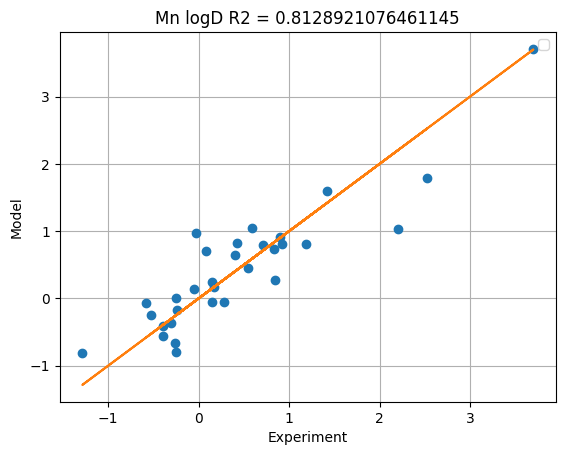

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


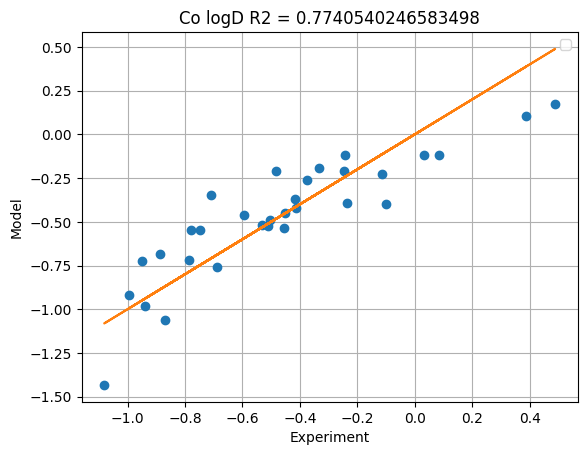

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


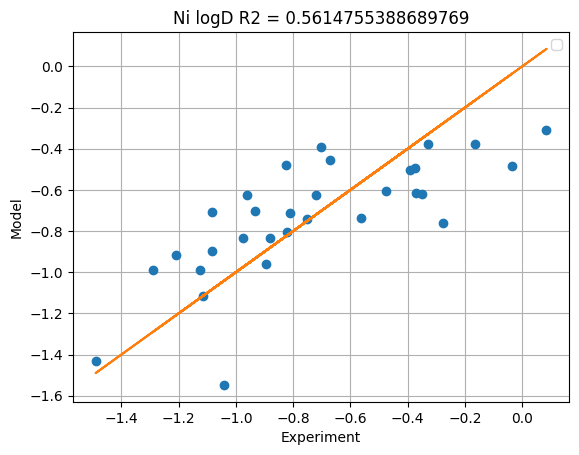

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


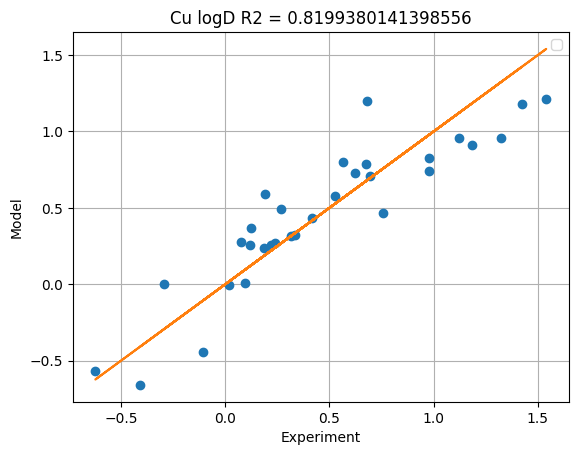

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

for element in m.elements:
    # for i in m.I:
        # if 0.0 <= m.logD_scaled_pred[i,element]() <= 0.2:
    plt.plot(m.logD[:, element](), m.logD_scaled_pred[:,element](), 'o')#, label=f'{i}')
    plt.plot(m.logD[:, element](), m.logD[:, element]())
    plt.xlabel(f'Experiment')
    plt.ylabel('Model')
    plt.grid()
    plt.title(f'{element} logD R2 = {r2_score(m.logD[:, element](), m.logD_scaled_pred[:,element]())}')
    plt.legend()
    plt.show()

In [10]:
m.logD_scaled_pred[:,'Ni'].pprint()

{Member of logD_scaled_pred} : Size=124, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (0, 'Ni') :  None : -0.8358465280605685 :  None : False : False :  Reals
{Member of logD_scaled_pred} : Size=124, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (1, 'Ni') :  None : -0.6193735039136133 :  None : False : False :  Reals
{Member of logD_scaled_pred} : Size=124, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (2, 'Ni') :  None : -0.8993553143783445 :  None : False : False :  Reals
{Member of logD_scaled_pred} : Size=124, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (3, 'Ni') :  None : -0.9156110413032114 :  None : False : False :  Reals
{Member of logD_scaled_pred} : Size=124, Index=I*elements
    Key       : Lower : Value                : Upper : Fixed : Stale : Domain
    (4, 'Ni') : 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,3.53,1.00,0.35,87.23,36.73,30.81,93.83,6.830854,0.580528,0.445296,...,0.366056,0.365534,0.834475,-0.236177,-0.351352,1.182057,0.736842,1.000000,1.000000,0.317460
2,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
3,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
4,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
5,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
6,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
7,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
8,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
9,2.56,1.00,0.35,99.38,44.25,25.13,85.06,160.290323,0.793722,0.335648,...,0.275920,0.136850,2.204907,-0.100332,-0.474115,0.755375,0.315789,1.000000,1.000000,0.317460


C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


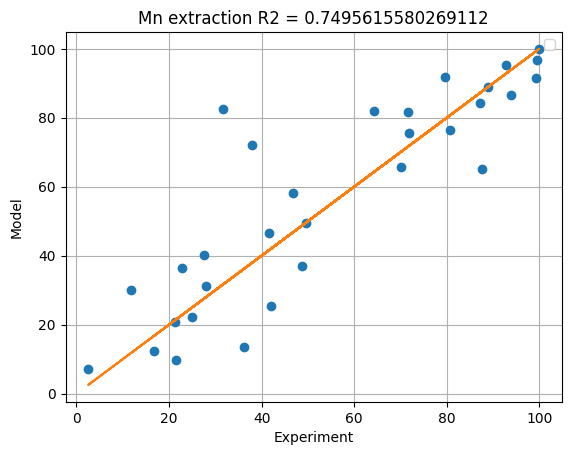

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


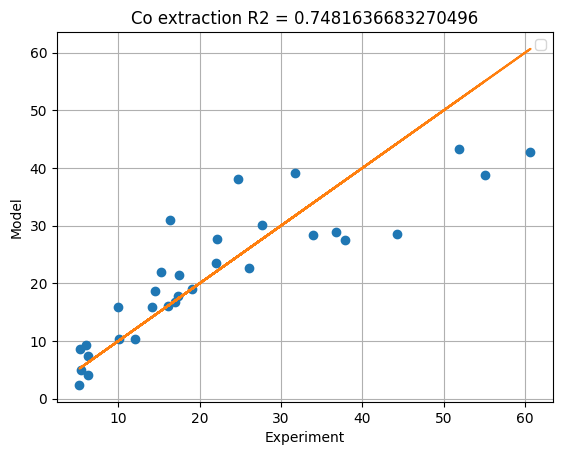

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


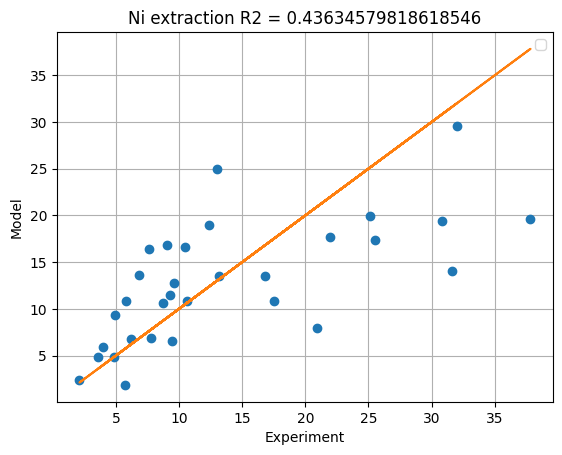

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43052\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


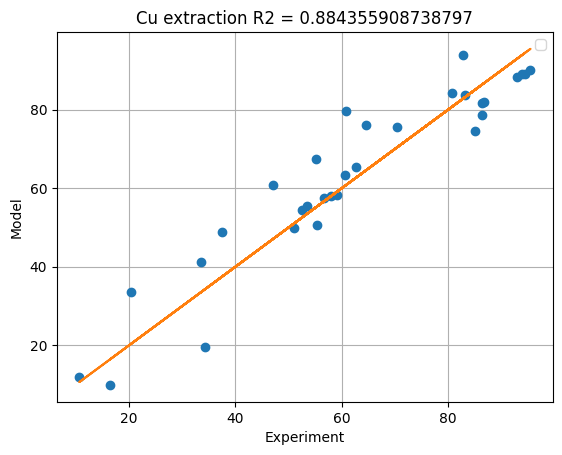

In [6]:
for element in m.elements:
    plt.plot(df[f"extraction_{element}"], m.extraction_perc[:, element](), 'o')
    plt.plot(df[f"extraction_{element}"], df[f"extraction_{element}"])
    plt.plot()
    plt.xlabel('Experiment')
    plt.ylabel('Model')
    plt.grid()
    plt.title(f'{element} extraction R2 = {r2_score(df[f"extraction_{element}"], m.extraction_perc[:, element]())}')
    plt.legend()
    plt.show()

In [7]:
from sklearn.metrics import r2_score

R_2_logD_values = {}
R_2_extract_values = {}
for element in m.elements:
    R_2_logD_values[element] = r2_score(m.logD[:, element](), m.logD_scaled_pred[:,element]())
    R_2_extract_values[element] = r2_score(df[f"extraction_{element}"], m.extraction_perc[:, element]())

print(R_2_logD_values)
print(R_2_extract_values)

{'Mn': 0.8128921076461145, 'Co': 0.7740540246583498, 'Ni': 0.5614755388689769, 'Cu': 0.8199380141398556}
{'Mn': 0.7495615580269112, 'Co': 0.7481636683270496, 'Ni': 0.43634579818618546, 'Cu': 0.884355908738797}


In [8]:
df.to_excel("debug_data.xlsx")

PermissionError: [Errno 13] Permission denied: 'debug_data.xlsx'

In [ ]:
scale = {1:0.19, 2:5.6e-5, 3:0.00014, 4:0.000189, 5:1}
for element in m.elements:
    print(f"{element} a121, a122 = {m.a12[1, element]()}, {m.a12[2, element]()}")
    print(f"{element} a123, a124, a125, a126 = {m.a12[3, element]()/scale[1]}, {m.a12[4, element]()/scale[2]}, {m.a12[5, element]()/scale[3]}, {m.a12[6, element]()/scale[4]}")
    print(f"{element} c121, c122, c123, c124 = {m.c12[1, element]()/scale[1]**2}, {m.c12[2, element]()/scale[2]**2}, {m.c12[3, element]()/scale[3]**2}, {m.c12[4, element]()/scale[4]**2}")
    print(f"{element} d121, d122, d123, d124 = {m.d12[1, element]()/scale[1]**3}, {m.d12[2, element]()/scale[2]**3}, {m.d12[3, element]()/scale[3]**3}, {m.d12[4, element]()/scale[4]**3}")
    print(f"{element} b12, b12 = {m.b12[:, element]()}")
for s in scale:    
    print(f"ai({s}): {m.ai[s+2]()/scale[s]}")

Mn a121, a122 = 1.2469759128298423, -1.3930306726881605
Mn a123, a124, a125, a126 = 11.387961183093331, 7663.139587178689, 7564.79625762901, -2103.4268826081866
Mn c121, c122, c123, c124 = -34.69863305463027, -126821290.52734642, -41028336.47168743, 9104100.254068045
Mn d121, d122, d123, d124 = 0.0, 0.0, 0.0, 0.0
Mn b12, b12 = [-1.4865402799732086, -0.000105028238661535, 0.5, 0.5, 0.5, 0.5]
Co a121, a122 = 0.8047250768636188, -0.06677967185701186
Co a123, a124, a125, a126 = -3.720130913338625, 665.1784865185684, 16301.358154984227, -3054.9435764367913
Co c121, c122, c123, c124 = 24.39971161692076, -1995868.9409294543, -79911301.33706008, 13587158.584504947
Co d121, d122, d123, d124 = 0.0, 0.0, 0.0, 0.0
Co b12, b12 = [-1.2635766618360067, 0.05654670885169601, 0.5, 0.5, 0.5, 0.5]
Ni a121, a122 = 0.40684033845540346, -0.5051058169120672
Ni a123, a124, a125, a126 = -2.7144672244024526, -8711.758702325631, 11875.845725670837, -2777.748810350317
Ni c121, c122, c123, c124 = 19.789754235789964

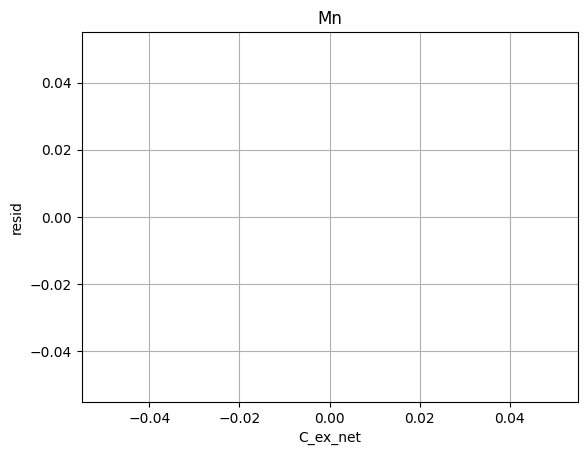

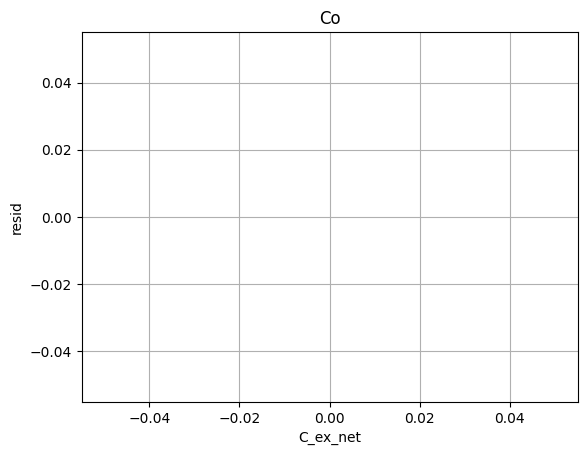

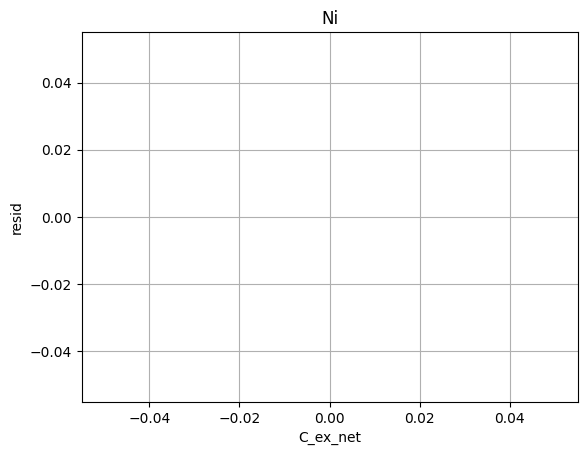

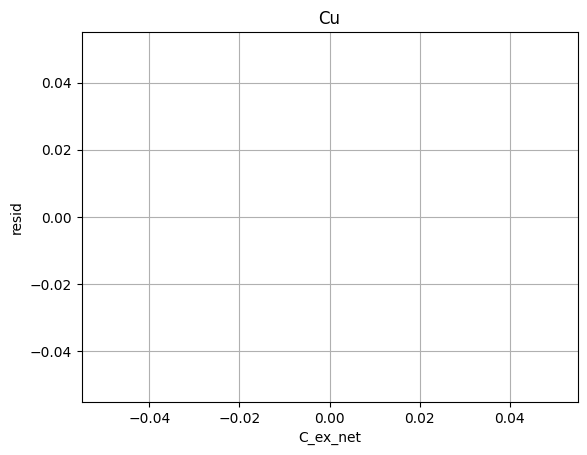

In [ ]:
for element in m.elements:
    plt.plot(m.Cext_net_pred[:](), m.resid[:,element](), 'o')
    plt.xlabel(f'C_ex_net')
    plt.ylabel('resid')
    plt.grid()
    plt.title(element)
    plt.show()

# Residual plots (for a = a1 + resid)

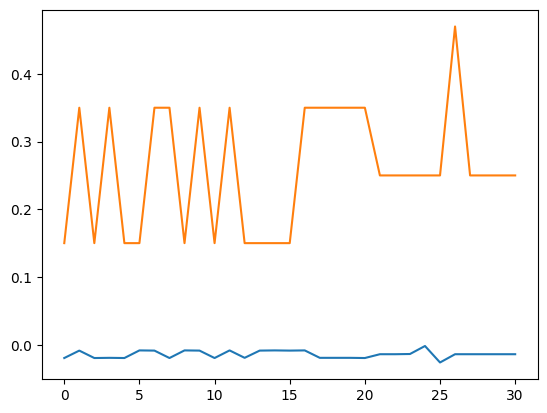

In [ ]:
@m.Expression(m.I)
def trm(m, i):
    return - m.ai[3]*m.Cfeed[i, "Mn"] - m.ai[4]*m.Cfeed[i, "Co"]  -m.ai[5]*m.Cfeed[i, "Cu"] - m.ai[6]*m.Cfeed[i, "Ni"]

plt.plot(m.trm[:]())
plt.plot(m.C_ex[:]())

# Outlier Detection

In [ ]:
!pip install scikit-learn

In [ ]:
data = df[[ 'pH_scaled','[D2EHPA] _scaled', '[Mn] (mol/L)_scaled', '[Co] (mol/L)_scaled',
       '[Ni] (mol/L)_scaled', '[Cu] (mol/L)_scaled', 'log D (obs)_Mn_scaled',
       'log D (obs)_Co_scaled'] ]

X = X_data = data.to_numpy()

/tmp/ipykernel_74280/2021683680.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


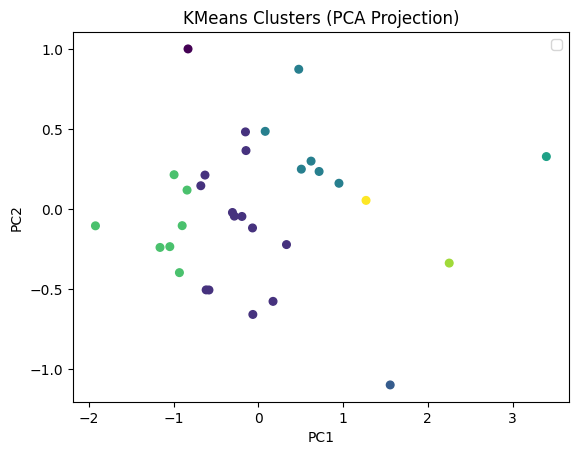

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_clusters = 5
# Fit KMeans
kmeans = KMeans(n_clusters=8)
labels = kmeans.fit_predict(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=30, cmap='viridis')
# plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (PCA Projection)")
plt.legend()
plt.show()



In [ ]:
kmeans.transform(X)

array([[0.        , 1.39123655, 3.23173876, 1.66586245, 4.40503193,
        1.28691261, 3.45117309, 2.61822083],
       [1.65634004, 1.05296154, 1.73629607, 0.55138977, 3.18535646,
        1.76523066, 1.98489869, 1.3699643 ],
       [1.28280061, 0.99720507, 2.78558394, 1.81410327, 4.59981007,
        0.53282553, 3.40326961, 2.62618505],
       [1.80467384, 0.76306168, 1.69565449, 0.98380046, 3.32379134,
        1.54973729, 1.96950582, 1.36847055],
       [1.76000676, 1.08464855, 1.80548158, 0.40408698, 3.04183284,
        1.8675929 , 1.96446569, 1.14506291],
       [1.69118957, 1.7133534 , 3.66723732, 2.60003363, 5.439813  ,
        0.89874717, 4.21970283, 3.34178406],
       [1.66281231, 0.76577471, 2.26040058, 1.50568401, 4.28780264,
        0.93235221, 2.96435722, 2.19476969],
       [1.26166231, 0.86625621, 2.24433116, 0.64589836, 3.54633916,
        1.42666844, 2.4707667 , 1.5754843 ],
       [1.28828993, 0.75175985, 2.40273045, 1.02551399, 3.82306747,
        1.33226752, 2.564019

In [ ]:
labels

array([0, 3, 5, 1, 3, 5, 1, 3, 1, 2, 5, 5, 1, 3, 5, 3, 1, 7, 1, 6, 1, 4,
       5, 1, 5, 1, 1, 1, 3, 1, 1], dtype=int32)

In [ ]:

for i in range(n_clusters):
    print(i, np.where(labels == i))

0 (array([0]),)
1 (array([ 3,  6,  8, 12, 16, 18, 20, 23, 25, 26, 27, 29, 30]),)
2 (array([9]),)
3 (array([ 1,  4,  7, 13, 15, 28]),)
4 (array([21]),)


In [ ]:
99.99/(100-99.99)

9998.999999994885